In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('../data/exchanges_dataset.csv')
print(df.head())
print(df.info())

         date          ARS       AUD       BHD        BWP       BRL       BND  \
0  2024-08-19  1044.724933  1.648111  0.416242  14.790201  5.982151  1.449103   
1  2024-08-18  1035.769998  1.650513  0.413867  14.821455  6.027775  1.448101   
2  2024-08-18  1035.523086  1.650120  0.413769  14.817922  6.026338  1.447756   
3  2024-08-17  1037.123603  1.652652  0.414430  14.841601  6.032349  1.450655   
4  2024-08-17  1037.785982  1.653707  0.414694  14.851079  6.038979  1.451581   

       BGN       CAD          CLP  ...        SEK       CHF        TWD  \
0  1.95583  1.511709  1025.652482  ...  11.436375  0.955396  35.409456   
1  1.95583  1.505641  1032.675027  ...  11.490299  0.953366  35.419950   
2  1.95583  1.505306  1032.428853  ...  11.487560  0.953139  35.411507   
3  1.95583  1.508522  1034.087752  ...  11.545206  0.954514  35.468017   
4  1.95583  1.508916  1034.748192  ...  11.552580  0.955123  35.490669   

         THB       TTD        TRY       AED       GBP       USD     

In [73]:
# Missing values in the 'HRK' column are forward-filled using the last available non-null value
df["HRK"] = df["HRK"].ffill()

In [74]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 date       0
ARS        0
AUD        0
BHD        0
BWP        0
BRL        0
BND        0
BGN        0
CAD        0
CLP        0
CNY        0
COP        0
HRK     1065
CZK        0
DKK        0
HKD        0
HUF        0
ISK        0
INR        0
IDR        0
IRR        0
ILS        0
JPY        0
KZT        0
KRW        0
KWD        0
LYD        0
MYR        0
MUR        0
MXN        0
NPR        0
NZD        0
NOK        0
OMR        0
PKR        0
PHP        0
PLN        0
QAR        0
RON        0
RUB        0
SAR        0
SGD        0
ZAR        0
LKR        0
SEK        0
CHF        0
TWD        0
THB        0
TTD        0
TRY        0
AED        0
GBP        0
USD        0
VES        0
dtype: int64


In [75]:
#average daily exchange rate of the USD
avg_usd = df["USD"].mean()
print(f"Average USD Rate: {avg_usd}")

Average USD Rate: 1.1157613666923276


In [76]:
#Finds the highest exchange rate for AUD in the year 2024
aud_2024 = df[df['date'].str.startswith('2024')]["AUD"].max()
print(f"Max AUD Rate in 2024: {aud_2024}")

Max AUD Rate in 2024: 1.68904


In [77]:
#Counts the total number of unique dates recorded in the dataset
total_days = df["date"].nunique()
print(f"Total Days Recorded: {total_days}")

Total Days Recorded: 3460


In [78]:
#the average monthly USD exchange rate for the year 2023
df['date'] = pd.to_datetime(df['date'])
avg_by_month_2023 = df[df['date'].dt.year == 2023].groupby(df['date'].dt.month)["USD"].mean()
print(avg_by_month_2023)

date
1     1.077869
2     1.069621
3     1.070387
4     1.097269
5     1.087166
6     1.085811
7     1.105418
8     1.090928
9     1.068016
10    1.056352
11    1.081565
12    1.091832
Name: USD, dtype: float64


In [79]:
# the top 10 most volatile currencies by average daily change
df_numeric = df.drop(columns=['date'])
diff = df_numeric.diff()
volatility = diff.abs().mean()
top_volatility = volatility.nlargest(10)
print(top_volatility)

VES    5.259515e+08
IRR    1.483410e+02
IDR    5.111627e+01
COP    1.802374e+01
KRW    3.726028e+00
CLP    3.574107e+00
KZT    1.543340e+00
LKR    8.561987e-01
HUF    8.532910e-01
PKR    7.039259e-01
dtype: float64


In [80]:
#the average exchange rate of Gulf currencies
gulf_currencies = df[["BHD", "AED", "QAR", "SAR"]].mean()
print(gulf_currencies)

BHD    0.419771
AED    4.097786
QAR    4.064576
SAR    4.184311
dtype: float64


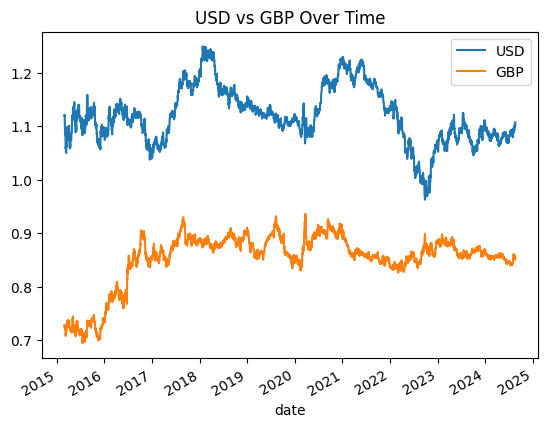

In [81]:
#Compares USD and GBP rates over time in a line chart
df.plot(x='date', y=['USD', 'GBP'], title="USD vs GBP Over Time")
plt.show()

In [82]:
#average yearly exchange rate of JPYavg_jpy_by_year = df.groupby(df['date'].dt.year)["JPY"].mean()
print(avg_jpy_by_year)

date
2015    133.972424
2016    120.289143
2017    126.704723
2018    130.322168
2019    122.068586
2020    121.813091
2021    129.837749
2022    137.982286
2023    154.082305
2024    165.123793
Name: JPY, dtype: float64


In [83]:
# Finds the maximum SAR rate recorded in 2015-2024
# Group by year and calculate the mean of the SAR column
df['year'] = df['date'].dt.year
sar_yearly_avg = df.groupby('year')['SAR'].mean()
print(sar_yearly_avg)

year
2015    4.134912
2016    4.150783
2017    4.239127
2018    4.428549
2019    4.198697
2020    4.281169
2021    4.436205
2022    3.951710
2023    4.058429
2024    4.059841
Name: SAR, dtype: float64


In [84]:
# Counts the number of days when CAD was below 1.5
# Ensure 'CAD' column is numeric (optional, for safety)
df['CAD'] = pd.to_numeric(df['CAD'], errors='coerce')
cad_below_15 = (df['CAD'] < 1.5).sum()
print(f"Days CAD < 1.5: {cad_below_15}")


Days CAD < 1.5: 2850


In [85]:
#the average exchange rate for European currencies ["EUR", "CHF", "SEK"]
df['EUR'] = 1.0
euro_currencies = df[["EUR", "CHF", "SEK"]].mean()
print("Average exchange rates for European currencies:")
print(euro_currencies)

Average exchange rates for European currencies:
EUR     1.000000
CHF     1.054403
SEK    10.456552
dtype: float64


In [86]:
#the maximum BRL exchange rate in 2024
brl_2024_max = df[df['date'].dt.year == 2024]['BRL'].max()
print(f"Max BRL Rate in 2024: {brl_2024_max}")

Max BRL Rate in 2024: 6.301526


In [87]:
#the change in CNY exchange rate during 2020
df_2020 = df[df['date'].dt.year == 2020].sort_values('date')
cny_2020_change = df_2020['CNY'].iloc[-1] - df_2020['CNY'].iloc[0]
print(f"CNY Change in 2020: {cny_2020_change}")

CNY Change in 2020: 0.18420099999999984


In [88]:
# Finds the maximum KRW rate in 2022
df_2022 = df[df['date'].dt.year == 2022]
krw_2022 = df_2022['KRW'].max()
print(f"Max KRW Rate in 2022: {krw_2022}")

Max KRW Rate in 2022: 1425.562898


In [89]:
#the average exchange rate of the Russian Ruble (RUB)
avg_rub = df["RUB"].mean()
print(f"Average RUB Rate: {avg_rub}")

Average RUB Rate: 80.57219405003848


In [90]:
# Ensure 'date' is datetime
df['year'] = df['date'].dt.year
avg_rub_per_year = df.groupby('year')['RUB'].mean()

print("Average RUB Rate per Year:")
print(avg_rub_per_year)


Average RUB Rate per Year:
year
2015    66.868196
2016    74.146724
2017    66.071982
2018    74.072713
2019    72.474239
2020    82.643647
2021    87.190309
2022    74.048115
2023    95.271502
2024    97.807630
Name: RUB, dtype: float64


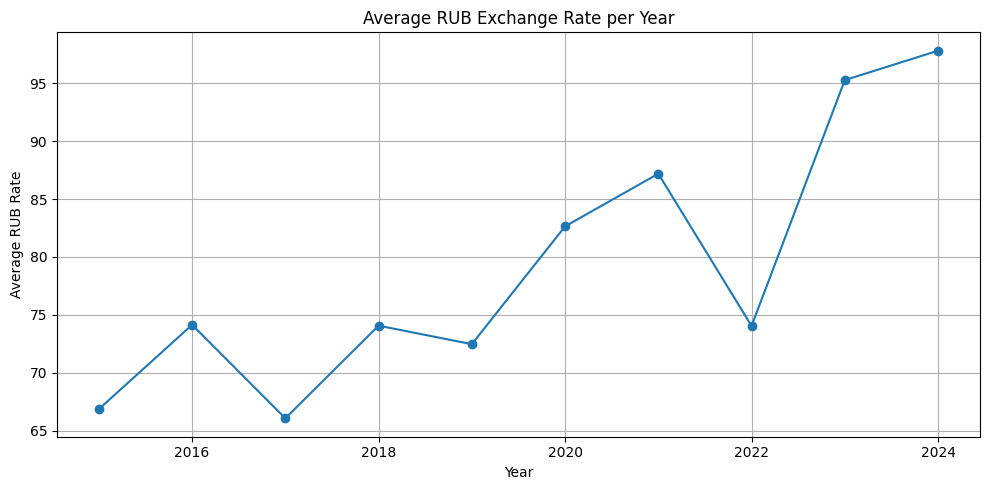

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(avg_rub_per_year.index, avg_rub_per_year.values, marker='o')
plt.title('Average RUB Exchange Rate per Year')
plt.xlabel('Year')
plt.ylabel('Average RUB Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

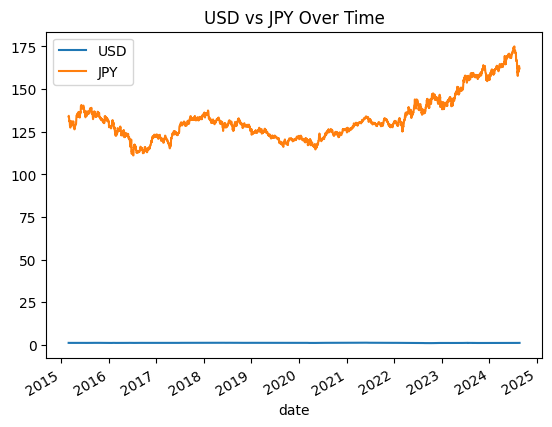

In [92]:
df.plot(x='date', y=['USD', 'JPY'], title="USD vs JPY Over Time")
plt.show()

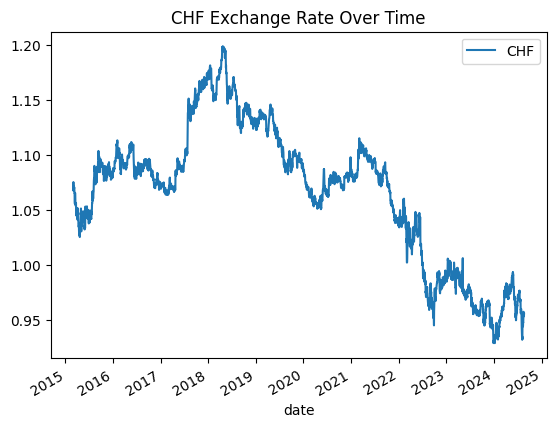

In [93]:
df.plot(x='date', y='CHF', title="CHF Exchange Rate Over Time")
plt.show()

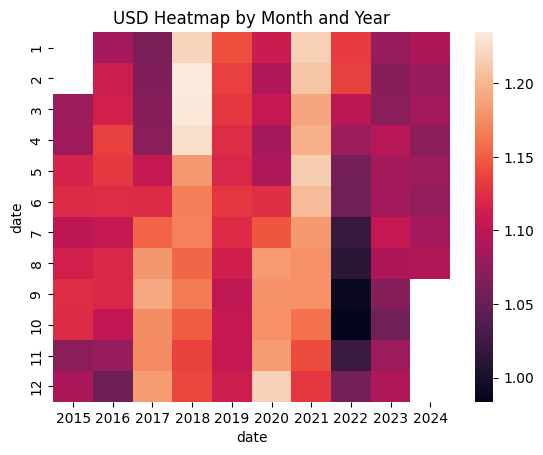

In [94]:
#USD Heatmap by Month and Year
pivot = df.pivot_table(values="USD", index=df['date'].dt.month, columns=df['date'].dt.year, aggfunc="mean")
sns.heatmap(pivot)
plt.title("USD Heatmap by Month and Year")
plt.show()